# Regresión Lineal y Polinomial

En este Notebook vamos a aprender cómo hacer una regresión lineal con Scikit Learn y después vamos a ver cómo entrenar nuestro propio modelo de regresión lineal con el algoritmo _Gradient Descent_.

## Regresión Lineal Simple

Para hacer una regresión lineal en Scikit Learn hacemos lo siguiente.

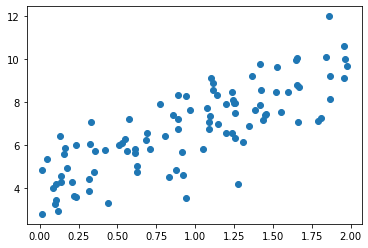

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Creamos datos que se ven lineales

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.scatter(X, y)

In [2]:
from sklearn.linear_model import LinearRegression

# Hacemos la regresión lineal

lin_reg = LinearRegression()

lin_reg.fit(X, y)

# Imprimimos n y m
lin_reg.intercept_, lin_reg.coef_

(array([4.13251789]), array([[2.75421673]]))

In [3]:
# Hacemos una predicción

lin_reg.predict([[5]])

array([[17.90360155]])

## Regresión Lineal Multivariable

Para hacer una regresión multivariable seguimos la misma estructura de Scikit Learn que hemos usado hasta ahora.

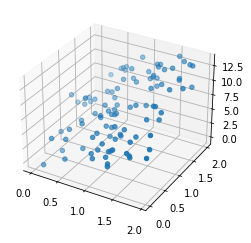

In [4]:
from mpl_toolkits.mplot3d import Axes3D

X = 2 * np.random.rand(100, 2)
y = 3 * X[:,[True, False]] + 4 * X[:,[False, True]] + np.random.randn(100, 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,[True, False]], X[:,[False, True]], y,  zdir='z')

In [5]:
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([-0.30041376]), array([[3.05654246, 4.14230158]]))

In [6]:
# Hacer una predicción

lin_reg.predict([[5, 5]])

array([[35.6938064]])

## Regresión Polinomial

Cuando tenemos puntos en el plano, podemos hacer _fit_ de un polinomio por los puntos en el plano usando el mismo algoritmo de regresión multivariable. Supón que tienes los puntos:

$$
[(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)]
$$

Si queremos una regresión con un polinomio de grado $k$ sobre estos datos, tenemos que agregar potencias de cada _feature_ hasta $k$ y después hacer _fit_ sobre eso:

| $f_0$ | $f_1$ | $f_2$ | $\dots$ | $f_k$ |
|---|---|---|---|---|
| $1$ | $x_1$ | $x_1^2$ | $\dots$ | $x_1^k$ |
| $1$ | $x_2$ | $x_2^2$ | $\dots$ | $x_2^k$ |
| $1$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
| $1$ | $x_n$ | $x_n^2$ | $\dots$ | $x_n^k$ |

Obtener estas _features_ extendidas es fácil con Scikit Learn.

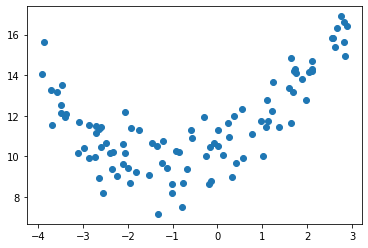

In [7]:
# Primero creamos datos que se ven cuadráticos

X = 7 * np.random.rand(100, 1) - 4
y = 0.5 * X**2 + X + 10 + np.random.randn(100, 1)

plt.scatter(X, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Si agregamos include_bias=True se crea una primera columna llena de 1s
# Esto representa el coeficiente de posición
# Pero el método fit de Linear Regression no lo necesita!
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-1.94030890e+00,  3.76479862e+00],
       [ 1.55464574e-02,  2.41692338e-04],
       [-2.72383596e+00,  7.41928231e+00],
       [ 1.01765693e+00,  1.03562563e+00],
       [-3.86333657e+00,  1.49253695e+01],
       [ 7.71684648e-01,  5.95497196e-01],
       [ 9.69297759e-01,  9.39538146e-01],
       [-7.72529349e-01,  5.96801595e-01],
       [ 1.59092877e+00,  2.53105435e+00],
       [ 2.11854940e+00,  4.48825157e+00],
       [ 1.21527018e+00,  1.47688162e+00],
       [ 2.87880745e+00,  8.28753231e+00],
       [-3.49953615e+00,  1.22467533e+01],
       [ 1.23267989e+00,  1.51949970e+00],
       [-2.97271410e+00,  8.83702912e+00],
       [-1.45357297e+00,  2.11287437e+00],
       [-1.34672333e+00,  1.81366372e+00],
       [ 1.30804534e-02,  1.71098261e-04],
       [ 1.64860162e+00,  2.71788729e+00],
       [-3.45824434e+00,  1.19594539e+01],
       [-2.71666602e+00,  7.38027426e+00],
       [ 1.97510223e+00,  3.90102882e+00],
       [ 4.06407122e-01,  1.65166748e-01],
       [-6.

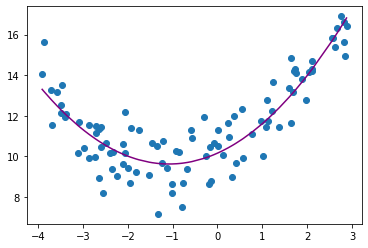

In [9]:
# Ahora hacemos la regresión y la graficaremos

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

plt.scatter(X, y)

# Para graficar la curva debemos ordenar los elementos según X y la primera columna de X_poly
# Recordemos además que predict recibe el x y x^2
plt.plot(X[X[:,0].argsort()], lin_reg.predict(X_poly[X_poly[:,0].argsort()]), color='purple')

Ahora, ¿por qué esto funciona? Esto es algo que tendrás que descubrir en el control.